In [1]:
import sklearn as sl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

### Carregamento dos dados

In [2]:
arquivo = 'dados/winequality.csv'
colunas = ['tipo', 'acidFixa', 'volatAcidez', 'acidoCitrico' , 'acucarResid', 'cloretos', 'dioxEnxLivre', 'dioxEnxTot', 'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade']
dados = pd.read_csv(arquivo, sep = ';',  header = 0, names = colunas)

In [3]:
dados.shape

(6497, 13)

In [4]:
dados.dtypes

tipo             object
acidFixa        float64
volatAcidez     float64
acidoCitrico    float64
acucarResid     float64
cloretos        float64
dioxEnxLivre    float64
dioxEnxTot      float64
densidade       float64
pH              float64
sulfatos        float64
alcool           object
qualidade         int64
dtype: object

In [5]:
dados.head()

,tipo,acidFixa,volatAcidez,acidoCitrico,acucarResid,cloretos,dioxEnxLivre,dioxEnxTot,densidade,pH,sulfatos,alcool,qualidade
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Tratamento dos dados

In [6]:
dados.isnull().values.any() 

False

In [7]:
dados.drop_duplicates(keep='first',inplace=True) 

In [8]:
dados.shape

(5320, 13)

In [9]:
tipoVinho = []
for i in dados['tipo']:
    if i == 'Red':
        tipoVinho.append(1)
    elif i == 'White':
        tipoVinho.append(2)
dados.insert (1, "TipoVinho", tipoVinho)

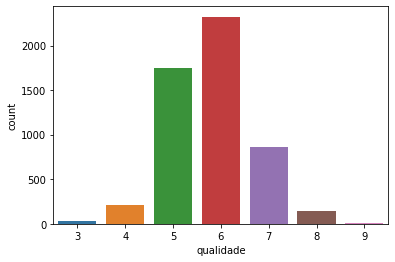

In [10]:
sns.countplot(x='qualidade', data=dados)

In [11]:
Counter(dados['qualidade'])

Counter({6: 2323, 5: 1752, 7: 856, 8: 148, 4: 206, 3: 30, 9: 5})

In [12]:
qualidadeAgrup = []
for i in dados['qualidade']:
    if i >= 0 and i <= 5:
        qualidadeAgrup.append(1)
    elif i >= 6 and i <= 10:
        qualidadeAgrup.append(2)
dados.insert (13, "qualidadeAgrup", qualidadeAgrup) 

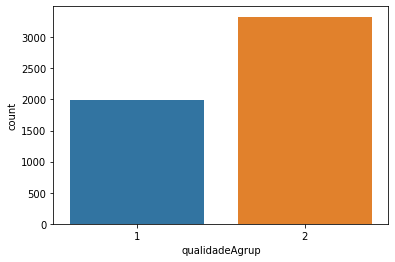

In [13]:
sns.countplot(x='qualidadeAgrup', data=dados)

In [14]:
dados.dtypes

tipo               object
TipoVinho           int64
acidFixa          float64
volatAcidez       float64
acidoCitrico      float64
acucarResid       float64
cloretos          float64
dioxEnxLivre      float64
dioxEnxTot        float64
densidade         float64
pH                float64
sulfatos          float64
alcool             object
qualidadeAgrup      int64
qualidade           int64
dtype: object

In [15]:
dados.head()

,tipo,TipoVinho,acidFixa,volatAcidez,acidoCitrico,acucarResid,cloretos,dioxEnxLivre,dioxEnxTot,densidade,pH,sulfatos,alcool,qualidadeAgrup,qualidade
0,White,2,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2,6
1,White,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2,6
2,White,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2,6
3,White,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2,6
6,White,2,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,2,6


In [16]:
dados_sujos = dados[dados['alcool'].str.contains('111.|222.|333.|444.|555.|666.|777.|888.|999.')]
dados_sujos[['tipo','alcool']].head()

,tipo,alcool
4315,White,128.933.333.333.333
4323,White,114.666.666.666.667
4341,White,100.333.333.333.333
4353,White,114.333.333.333.333
4356,White,105.333.333.333.333


In [17]:
dados_sujos.shape

(32, 15)

In [18]:
dados_limpos = dados[~dados['alcool'].str.contains('111.|222.|333.|444.|555.|666.|777.|888.|999.')]

In [19]:
dados_limpos.shape

(5288, 15)

In [20]:
dados_limpos['alcool'] = dados_limpos['alcool'].astype(float)

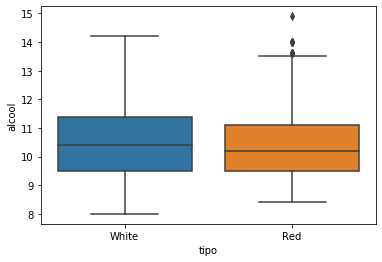

In [21]:
sns.boxplot('tipo', 'alcool', data = dados_limpos)

In [22]:
dados_agrup = dados_limpos.groupby('tipo').mean()
dados_agrup

,TipoVinho,acidFixa,volatAcidez,acidoCitrico,acucarResid,cloretos,dioxEnxLivre,dioxEnxTot,densidade,pH,sulfatos,alcool,qualidadeAgrup,qualidade
tipo,,,,,,,,,,,,,,
Red,1.0,8.312851,0.529040,0.272651,2.521566,0.088169,15.887001,46.724151,1.995159,3.309734,0.658589,10.431352,1.527326,5.621123
White,2.0,6.843454,0.280513,0.334520,5.921124,0.045921,34.881800,137.212125,1.569457,3.195442,0.490130,10.586634,1.659380,5.854347


In [23]:
media_red = dados_agrup['alcool']['Red']
media_red

10.431351550960098

In [24]:
media_white = dados_agrup['alcool']['White']
media_white

10.586634468734156

In [25]:
dados_novos = dados.replace({'alcool': r'^.*333.333.*$|^.*666.666.*$'}, {'alcool': np.nan}, regex=True)

In [26]:
dados_novos['alcool'] = dados_novos['alcool'].astype(float)

In [27]:
def trocaNA(tipoVinho, valorCol):
    if np.isnan(valorCol) and tipoVinho =='Red':
        return media_red
    elif np.isnan(valorCol) and tipoVinho =='White':
        return media_white
    else :
        return valorCol

In [28]:
dados_novos['alcool'] = dados_novos.apply(lambda x: trocaNA(x['tipo'], x['alcool']), axis=1)

In [29]:
dados_novos['qualidade'] = dados_novos['qualidade'].astype(float)

In [30]:
dados_novos.dtypes

tipo               object
TipoVinho           int64
acidFixa          float64
volatAcidez       float64
acidoCitrico      float64
acucarResid       float64
cloretos          float64
dioxEnxLivre      float64
dioxEnxTot        float64
densidade         float64
pH                float64
sulfatos          float64
alcool            float64
qualidadeAgrup      int64
qualidade         float64
dtype: object

In [31]:
print(dados_novos.isna().sum())

tipo              0
TipoVinho         0
acidFixa          0
volatAcidez       0
acidoCitrico      0
acucarResid       0
cloretos          0
dioxEnxLivre      0
dioxEnxTot        0
densidade         0
pH                0
sulfatos          0
alcool            0
qualidadeAgrup    0
qualidade         0
dtype: int64


### Análise dos dados

In [32]:
dados.describe()

,TipoVinho,acidFixa,volatAcidez,acidoCitrico,acucarResid,cloretos,dioxEnxLivre,dioxEnxTot,densidade,pH,sulfatos,qualidadeAgrup,qualidade
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,1.744549,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,1.674335,3.224664,0.533357,1.626316,5.795677
std,0.436155,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,7.494908,0.160379,0.149743,0.483827,0.879772
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,1.000000,3.000000
25%,1.000000,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,1.000000,5.000000
50%,2.000000,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,2.000000,6.000000
75%,2.000000,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,2.000000,6.000000
max,2.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,2.000000,9.000000


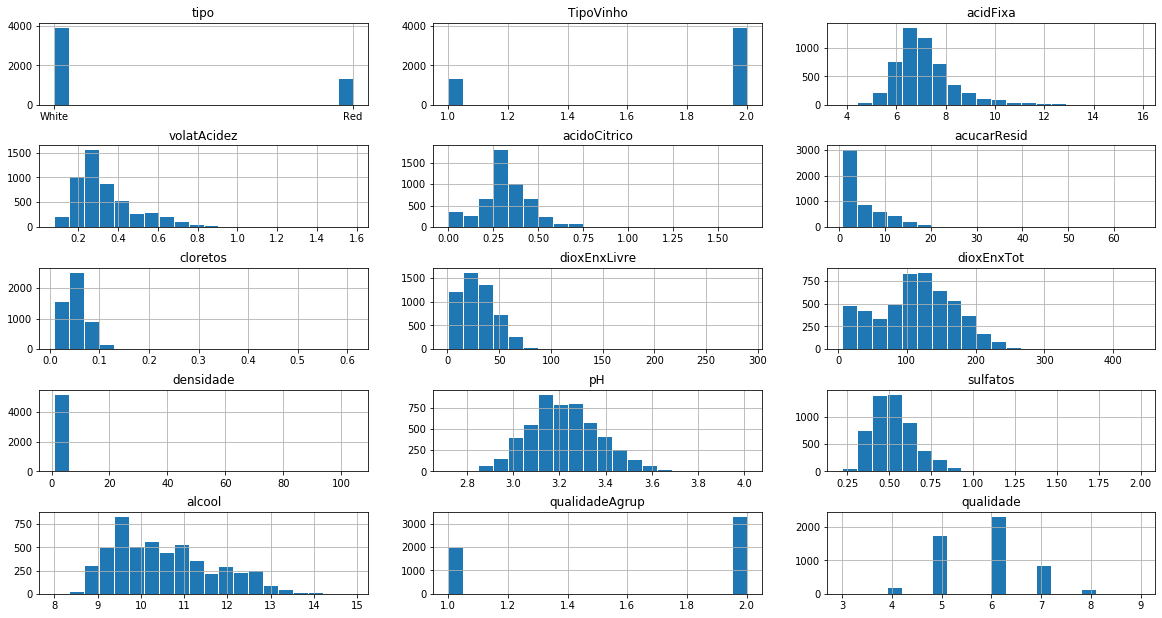

In [33]:
columns=dados_novos.columns[:15]
plt.subplots(figsize=(20,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dados_novos[i].hist(bins=20,edgecolor='white')
    plt.title(i)
plt.show()

### Remoção outliers

In [34]:
colunas=['acidFixa', 'volatAcidez', 'acidoCitrico', 'acucarResid', 'cloretos', 'dioxEnxLivre', 'dioxEnxTot', 'densidade', 'pH', 'sulfatos']

for i in colunas:   
    primeiro_quartil = dados_novos[i].describe()['25%']
    terceiro_quartil = dados_novos[i].describe()['75%']
    variacaoInterQuartil = terceiro_quartil - primeiro_quartil
    dados_novos = dados_novos[(dados_novos[i] > (primeiro_quartil - 3 * variacaoInterQuartil)) &
                 (dados_novos[i] < (terceiro_quartil + 3 * variacaoInterQuartil))]

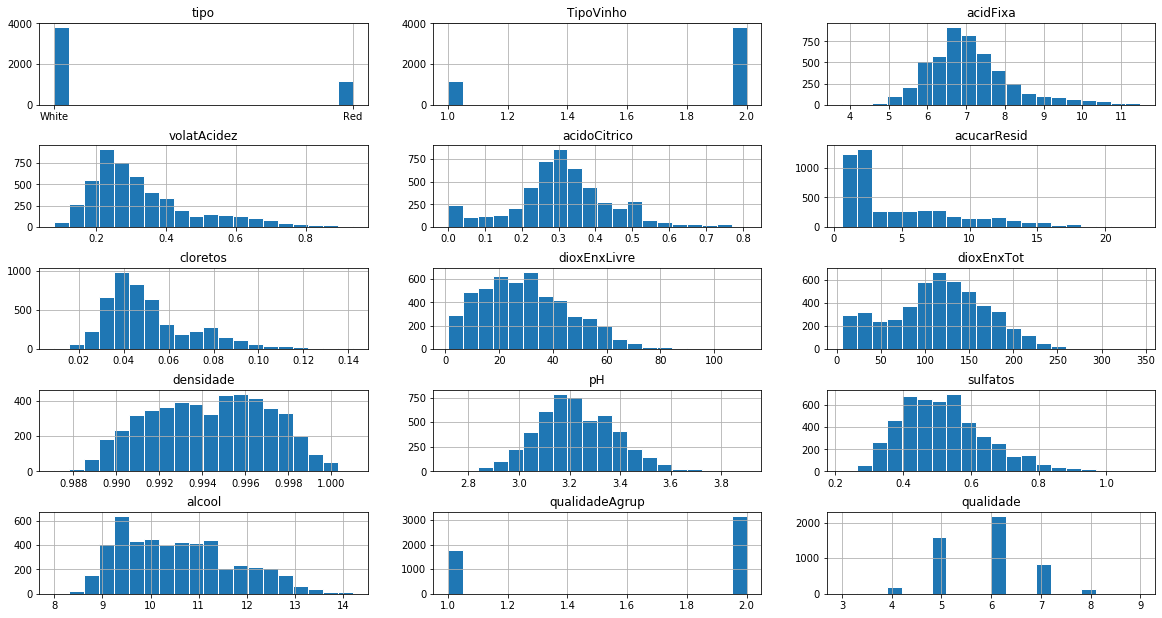

In [35]:
columns=dados_novos.columns[:15]
plt.subplots(figsize=(20,15))
length=len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dados_novos[i].hist(bins=20,edgecolor='white')
    plt.title(i)
plt.show()

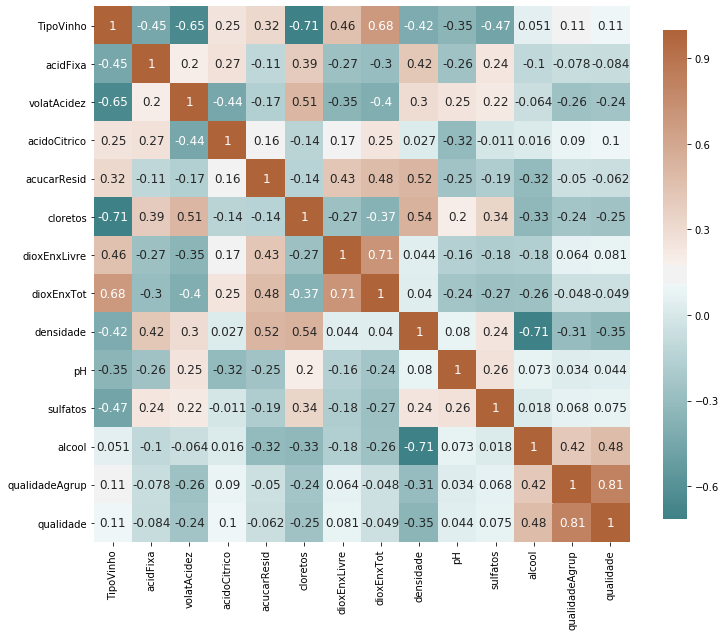

In [36]:
corr = dados_novos.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 200 , 30 , as_cmap = True )
_ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })

In [37]:
dados_novos.shape

(4970, 15)

In [38]:
dados_novos.head()

,tipo,TipoVinho,acidFixa,volatAcidez,acidoCitrico,acucarResid,cloretos,dioxEnxLivre,dioxEnxTot,densidade,pH,sulfatos,alcool,qualidadeAgrup,qualidade
0,White,2,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2,6.0
1,White,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2,6.0
2,White,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2,6.0
3,White,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2,6.0
6,White,2,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,2,6.0


### Normalização dos dados

In [39]:
dados_norm=dados_novos[dados_novos.columns[1:13]]
target=dados_novos['qualidadeAgrup']

In [40]:
scaler = MinMaxScaler(feature_range = (0, 1))
cols = dados_norm.columns
dados_norm[cols] = scaler.fit_transform(dados_norm)
dados_norm.head()

,TipoVinho,acidFixa,volatAcidez,acidoCitrico,acucarResid,cloretos,dioxEnxLivre,dioxEnxTot,densidade,pH,sulfatos,alcool
0,1.0,0.415584,0.222222,0.444444,0.913636,0.270677,0.396396,0.485207,1.000000,0.237288,0.261364,0.129032
1,1.0,0.324675,0.257310,0.419753,0.045455,0.300752,0.117117,0.372781,0.496040,0.491525,0.306818,0.241935
2,1.0,0.558442,0.233918,0.493827,0.286364,0.308271,0.261261,0.269231,0.575234,0.457627,0.250000,0.338710
3,1.0,0.441558,0.175439,0.395062,0.359091,0.368421,0.414414,0.532544,0.611231,0.398305,0.204545,0.306452
6,1.0,0.311688,0.280702,0.197531,0.290909,0.270677,0.261261,0.384615,0.560835,0.389831,0.284091,0.258065


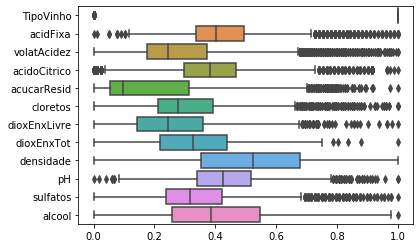

In [41]:
sns.boxplot(data = dados_norm, orient = "h")

### Divisão dados Treino/Teste

In [42]:
x_train, x_test, y_train, y_test = train_test_split(dados_norm, target, test_size = 0.30, random_state = 78)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3479, 12)
(1491, 12)
(3479,)
(1491,)


### Seleção de variáveis através do Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=100, 
                             max_depth=6,
                             random_state=30)
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [45]:
features = [col for col in list(x_train)]
importances =  rf.feature_importances_
descending_indices = np.argsort(importances)[::-1]
sorted_importances = [importances[idx] for idx in descending_indices]
sorted_features = [features[idx] for idx in descending_indices]
print('Variável mais importante na qualidade do vinho: %s' % sorted_features[0])

Variável mais importante na qualidade do vinho: alcool


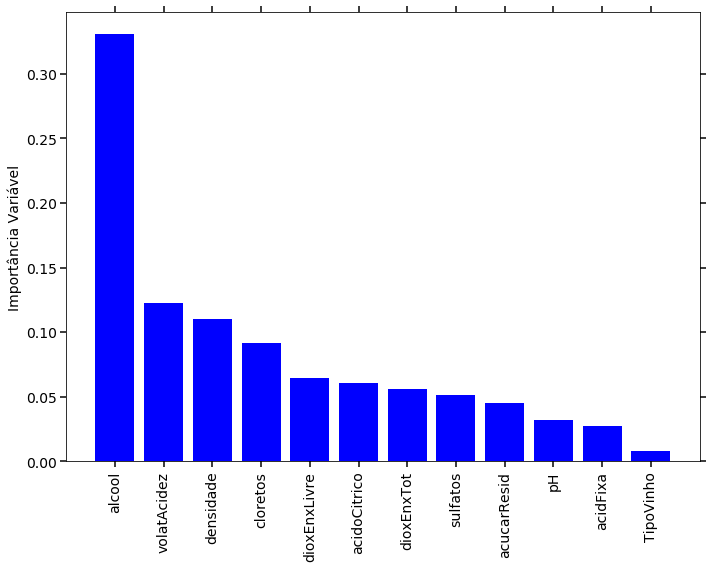

In [46]:
def plot_varImportancia(x_train, sorted_features, sorted_importances):
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 14
    bar_color = 'blue'
    align = 'center'
    label = '__nolegend__'
    ax = plt.bar(range(x_train.shape[1]), sorted_importances, color=bar_color, align=align, label=label)
    ax = plt.xticks(range(x_train.shape[1]), sorted_features, rotation=90)
    ax = plt.xlim([-1, x_train.shape[1]])
    ax = plt.ylabel('Importância Variável', fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, which='major', right=True, top=True)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tight_layout()
    return ax

fig1 = plt.figure(1, figsize=(10,8))

ax = plot_varImportancia(x_train, sorted_features, sorted_importances)

plt.show()
plt.close()

### Modelagem com as principais variáveis

In [47]:
x_train=x_train[['alcool','volatAcidez','densidade','cloretos','sulfatos','dioxEnxLivre','acidoCitrico','acucarResid', 'dioxEnxTot']]
x_test = x_test[['alcool','volatAcidez','densidade','cloretos','sulfatos','dioxEnxLivre','acidoCitrico','acucarResid', 'dioxEnxTot']]

In [48]:
resumo=[]
classifier=['Logistic Regression', 'KNN', 'Decision Tree','Naive Bayes', 'Random Forest', 'SVC', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
models=[LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3), 
        DecisionTreeClassifier(random_state=234), 
        GaussianNB(), 
        RandomForestClassifier(n_estimators=100, max_depth=6, random_state=30), 
        SVC(), 
        AdaBoostClassifier(n_estimators = 30, random_state = 5),
        GradientBoostingClassifier(n_estimators = 100, random_state = 89),
        XGBClassifier()]

for i in models:
    model = i
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)    
    resumo.append(balanced_accuracy_score(y_test, prediction))
        
models_dataframe=pd.DataFrame(resumo,index=classifier)   
models_dataframe.columns=['Acurácia Balanceada']
models_dataframe

,Acurácia Balanceada
Logistic Regression,0.698615
KNN,0.687542
Decision Tree,0.651092
Naive Bayes,0.670788
Random Forest,0.712756
SVC,0.720186
AdaBoost,0.703692
Gradient Boosting,0.713603
XGBoost,0.722313


### Redução de dimensionalidade PCA

In [49]:
pca = PCA()
x_pca = pca.fit(dados_norm)

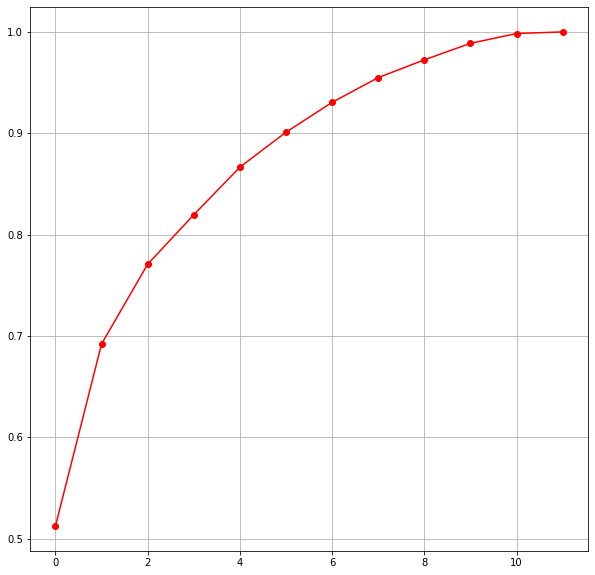

In [50]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [51]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(dados_norm)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, target, test_size = 0.3, random_state = 12)

In [53]:
resumo=[]
classifier=['Logistic Regression', 'KNN', 'Decision Tree','Naive Bayes', 'Random Forest', 'SVC','AdaBoost', 'Gradient Boosting', 'XGBoost']
models=[LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3), 
        DecisionTreeClassifier(random_state=234), 
        GaussianNB(), 
        RandomForestClassifier(n_estimators=100, max_depth=6, random_state=30), 
        SVC(),
        AdaBoostClassifier(n_estimators = 30, random_state = 5),
        GradientBoostingClassifier(n_estimators = 100, random_state = 89),
        XGBClassifier()]

for i in models:
    model = i
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)    
    resumo.append(balanced_accuracy_score(y_test, prediction))
        
models_dataframe=pd.DataFrame(resumo,index=classifier)   
models_dataframe.columns=['Acurácia Balanceada PCA']
models_dataframe

,Acurácia Balanceada PCA
Logistic Regression,0.702528
KNN,0.690374
Decision Tree,0.656751
Naive Bayes,0.693760
Random Forest,0.708604
SVC,0.726678
AdaBoost,0.709864
Gradient Boosting,0.742063
XGBoost,0.730436


### Cross Validation

In [54]:
num_folds = 3
seed = 89
kfold = KFold(num_folds, True, random_state = seed)

resumo=[]
classifier=['Logistic Regression', 'KNN', 'Decision Tree','Naive Bayes', 'Random Forest', 'SVC', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
models=[LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3), 
        DecisionTreeClassifier(random_state=234), 
        GaussianNB(), 
        RandomForestClassifier(n_estimators=100, max_depth=6, random_state=30), 
        SVC(),
        AdaBoostClassifier(n_estimators = 30, random_state = 5),
        GradientBoostingClassifier(n_estimators = 100, random_state = 89),
        XGBClassifier()]

for i in models:
    modelo = i
    resultado = cross_val_score(modelo, dados_norm, target, cv = kfold) 
    resumo.append(resultado.mean())
        
models_dataframe=pd.DataFrame(resumo,index=classifier)   
models_dataframe.columns=['Acurácia CrossValidation']
models_dataframe

,Acurácia CrossValidation
Logistic Regression,0.745672
KNN,0.727162
Decision Tree,0.691548
Naive Bayes,0.695773
Random Forest,0.760360
SVC,0.757544
AdaBoost,0.744867
Gradient Boosting,0.760561
XGBoost,0.762171


Por apresentar a melhor acurácia após os processos de feature selection, redução de dimensionalidade e cross validation, o algoritmo XGBoost foi o escolhido.